In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

merged_df = pd.read_csv('NHANES_merged.csv')

In [4]:
merged_df.head()

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD2,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L)
0,62161.0,7.0,1.0,22.0,264.0,3.0,N\A,69.2,23.3,NaN,...,1.45,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62162.0,7.0,2.0,3.0,36.0,1.0,N\A,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,7.0,1.0,14.0,168.0,5.0,N\A,49.4,17.3,NaN,...,1.45,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62164.0,7.0,2.0,44.0,528.0,3.0,2.0,67.2,23.2,NaN,...,1.45,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62165.0,7.0,2.0,14.0,168.0,4.0,N\A,69.1,27.2,NaN,...,1.45,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
merged_df.shape

(101316, 52)

In [6]:
# check non-null rows per column
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101316 entries, 0 to 101315
Data columns (total 52 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    101316 non-null  float64
 1   Yr_Cycle              101316 non-null  float64
 2   Gender                101316 non-null  float64
 3   Age(yr)               101316 non-null  float64
 4   Age(Months)           101316 non-null  float64
 5   Race                  101316 non-null  float64
 6   PregnStat             101316 non-null  object 
 7   Weight                95182 non-null   float64
 8   BMI                   87799 non-null   float64
 9   alco_dks_daily#       31951 non-null   float64
 10  smokescigs_daily#     9993 non-null    float64
 11  had_anemia_treatment  59074 non-null   float64
 12  had_cancer            33141 non-null   float64
 13  cancertype1           3094 non-null    float64
 14  cancertype2           315 non-null     float64
 15  

In [7]:
# check total null rows per column
merged_df.isna().sum()

ID                           0
Yr_Cycle                     0
Gender                       0
Age(yr)                      0
Age(Months)                  0
Race                         0
PregnStat                    0
Weight                    6134
BMI                      13517
alco_dks_daily#          69365
smokescigs_daily#        91323
had_anemia_treatment     42242
had_cancer               68175
cancertype1              98222
cancertype2             101001
cancertype3             101281
HIV                      68102
White_Cell_num           18393
Lymphocyte(%)            18572
Monocyte(%)              18572
SegNeutrophil(%)         18572
Eosinophil(%)            18572
Basophil(%)              18572
Lymphocyte_num           18575
Monocyte_num             18575
SegNeutrophil_num        18575
Eosinophil_num           18575
Basophil_num             18575
Red_Cell_num             18390
Subsweights              93318
Cu(ug/dL)                94031
Cu(umol/L)               94031
Se(ug/L)

In [8]:
merged_df["Gender"].replace({1: 'M', 2: 'F'}, inplace = True)
merged_df["Race"].replace({1: 'White', 2: 'Black', 3: 'MexAm', 4: 'Other', 5: 'Other-Hisp'}, inplace = True)

In [9]:
merged_df.head()

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD2,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L)
0,62161.0,7.0,M,22.0,264.0,MexAm,N\A,69.2,23.3,NaN,...,1.45,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62162.0,7.0,F,3.0,36.0,White,N\A,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,7.0,M,14.0,168.0,Other-Hisp,N\A,49.4,17.3,NaN,...,1.45,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62164.0,7.0,F,44.0,528.0,MexAm,2.0,67.2,23.2,NaN,...,1.45,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62165.0,7.0,F,14.0,168.0,Other,N\A,69.1,27.2,NaN,...,1.45,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_df["PregnStat"].value_counts()

N\A    81776
2.0    16164
1.0     1722
3.0     1654
Name: PregnStat, dtype: int64

In [11]:
merged_df["PregnStat"].replace({'1.0':'Yes', '2.0':'No', '3.0':'Unk', 'N\A': 'No'}, inplace = True)

In [12]:
merged_df.head(15)

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD2,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L)
0,62161.0,7.0,M,22.0,264.0,MexAm,No,69.2,23.3,NaN,...,1.45,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62162.0,7.0,F,3.0,36.0,White,No,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,7.0,M,14.0,168.0,Other-Hisp,No,49.4,17.3,NaN,...,1.45,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62164.0,7.0,F,44.0,528.0,MexAm,No,67.2,23.2,NaN,...,1.45,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62165.0,7.0,F,14.0,168.0,Other,No,69.1,27.2,NaN,...,1.45,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,62166.0,7.0,M,9.0,108.0,MexAm,No,28.8,16.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,62167.0,7.0,M,0.0,11.0,Other-Hisp,No,10.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,62168.0,7.0,M,6.0,72.0,Other-Hisp,No,23.6,15.4,NaN,...,7.78,74.18,5.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,62169.0,7.0,M,21.0,252.0,Other-Hisp,No,54.6,20.1,2.0,...,1.45,24.39,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,62170.0,7.0,M,15.0,180.0,Other-Hisp,No,63.5,18.2,NaN,...,3.19,82.49,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
merged_df['Lymphocyte(%)'].describe()

count    82744.000000
mean        33.616705
std         10.715035
min          2.600000
25%         26.300000
50%         32.400000
75%         39.800000
max         94.500000
Name: Lymphocyte(%), dtype: float64

In [14]:
merged_df['Eosinophil(%)'].describe()

count    8.274400e+04
mean     3.035912e+00
std      2.438622e+00
min      5.397605e-79
25%      1.500000e+00
50%      2.400000e+00
75%      3.800000e+00
max      5.720000e+01
Name: Eosinophil(%), dtype: float64

In [15]:
merged_df['Monocyte(%)'].describe()

count    82744.000000
mean         8.039510
std          2.360588
min          0.600000
25%          6.500000
50%          7.800000
75%          9.300000
max         66.900000
Name: Monocyte(%), dtype: float64

In [16]:
merged_df['SegNeutrophil_num'].describe()

count    82741.000000
mean         4.063330
std          1.788205
min          0.100000
25%          2.800000
50%          3.800000
75%          5.000000
max         83.100000
Name: SegNeutrophil_num, dtype: float64

In [17]:
merged_df['Basophil(%)'].describe()

count    8.274400e+04
mean     7.017802e-01
std      5.352531e-01
min      5.397605e-79
25%      4.000000e-01
50%      6.000000e-01
75%      9.000000e-01
max      3.540000e+01
Name: Basophil(%), dtype: float64

In [18]:
merged_df['White_Cell_num'].describe()

count    82923.000000
mean         7.307269
std          2.743337
min          1.400000
25%          5.700000
50%          7.000000
75%          8.500000
max        400.000000
Name: White_Cell_num, dtype: float64

In [19]:
merged_df[(merged_df['Lymphocyte_num'] < 1.4) | (merged_df['Lymphocyte_num'] > 5.7)].count()

ID                      7563
Yr_Cycle                7563
Gender                  7563
Age(yr)                 7563
Age(Months)             7563
Race                    7563
PregnStat               7563
Weight                  7389
BMI                     6730
alco_dks_daily#         3188
smokescigs_daily#        541
had_anemia_treatment    4730
had_cancer              3496
cancertype1              630
cancertype2               90
cancertype3               11
HIV                     2313
White_Cell_num          7563
Lymphocyte(%)           7563
Monocyte(%)             7563
SegNeutrophil(%)        7563
Eosinophil(%)           7563
Basophil(%)             7563
Lymphocyte_num          7563
Monocyte_num            7563
SegNeutrophil_num       7563
Eosinophil_num          7563
Basophil_num            7563
Red_Cell_num            7563
Subsweights              635
Cu(ug/dL)                625
Cu(umol/L)               625
Se(ug/L)                 625
Se(umol/L)               625
Zn(ug/dL)     

In [20]:
merged_df[(merged_df['Lymphocyte(%)'] < 20) | (merged_df['Lymphocyte(%)'] > 40)].count()

ID                      26729
Yr_Cycle                26729
Gender                  26729
Age(yr)                 26729
Age(Months)             26729
Race                    26729
PregnStat               26729
Weight                  26337
BMI                     24554
alco_dks_daily#          6897
smokescigs_daily#        2101
had_anemia_treatment    16516
had_cancer               6999
cancertype1               765
cancertype2                85
cancertype3                 8
HIV                      7255
White_Cell_num          26727
Lymphocyte(%)           26729
Monocyte(%)             26729
SegNeutrophil(%)        26729
Eosinophil(%)           26729
Basophil(%)             26729
Lymphocyte_num          26727
Monocyte_num            26727
SegNeutrophil_num       26727
Eosinophil_num          26727
Basophil_num            26727
Red_Cell_num            26729
Subsweights              2056
Cu(ug/dL)                2010
Cu(umol/L)               2010
Se(ug/L)                 2010
Se(umol/L)

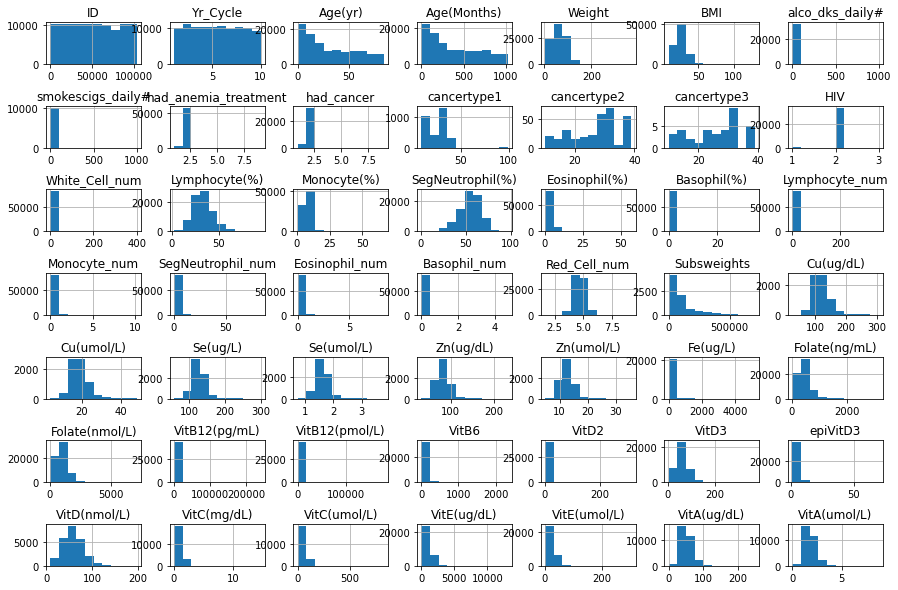

In [21]:
merged_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=1.0)

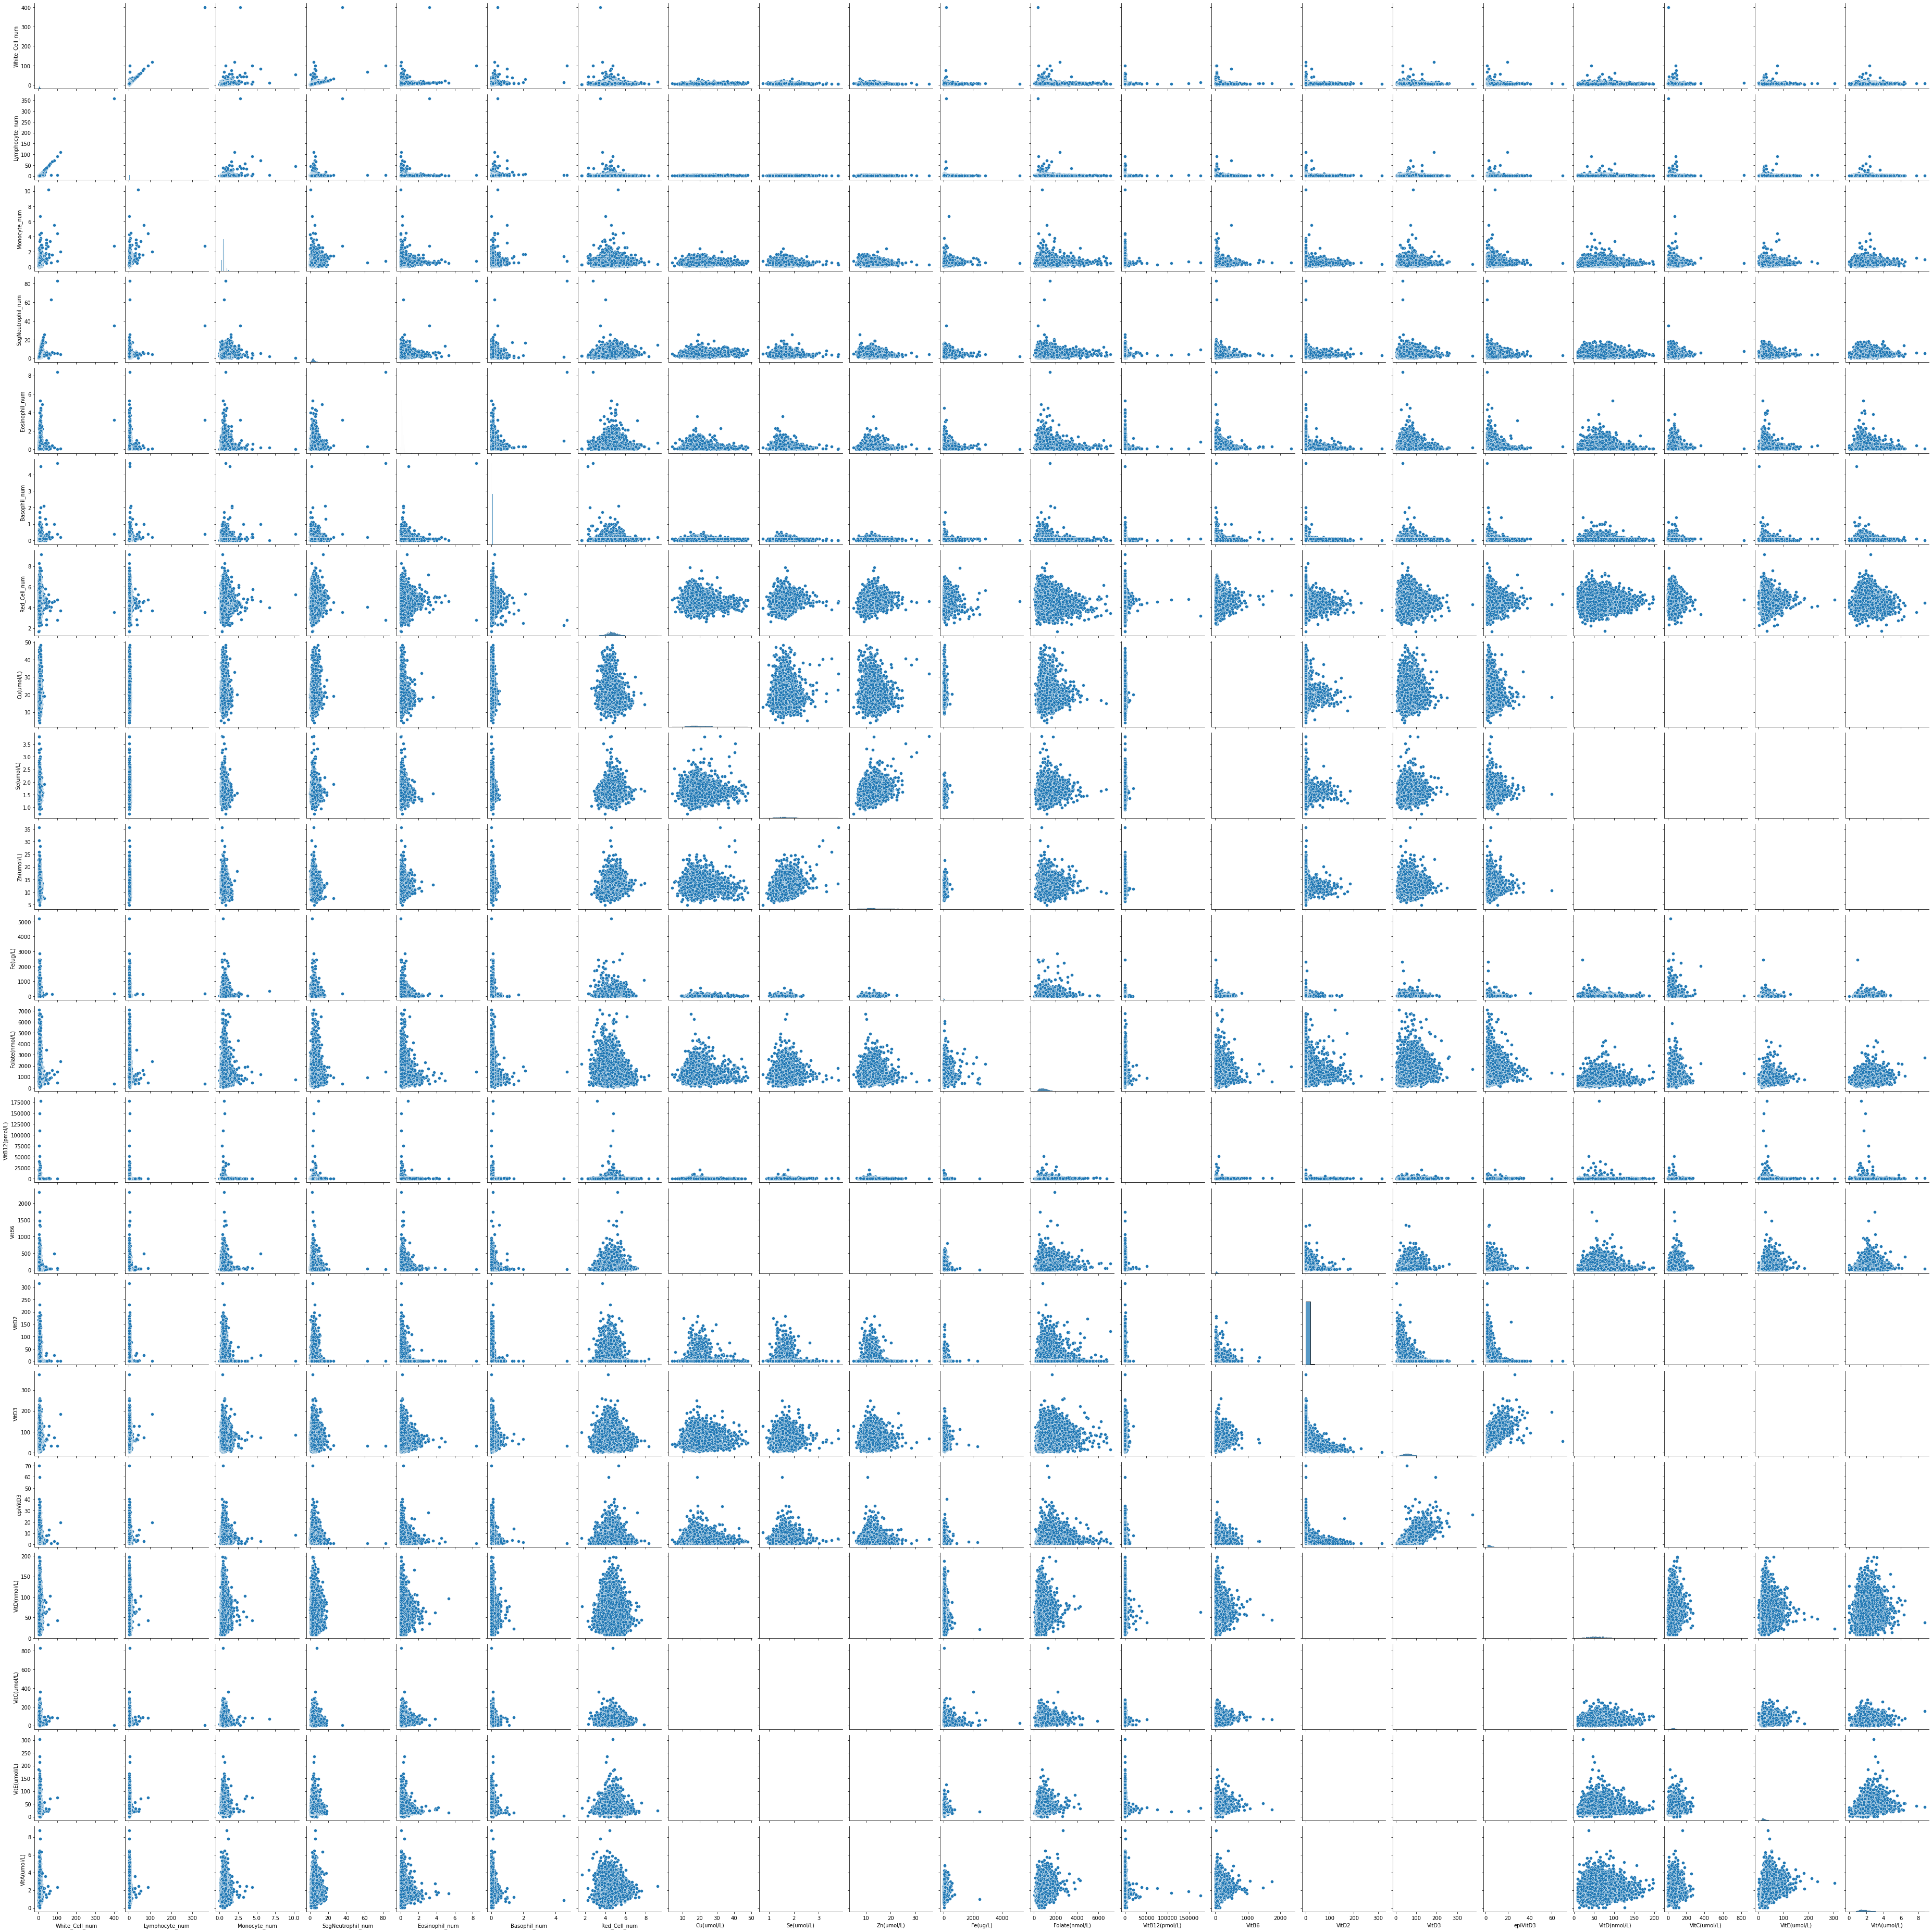

In [22]:
sel_colnames = {
    "LBXWBCSI" : "White_Cell_num",
    "LBDLYMNO" : "Lymphocyte_num",
    "LBDMONO" : "Monocyte_num",
    "LBDNENO" : "SegNeutrophil_num",
    "LBDEONO" : "Eosinophil_num",
    "LBDBANO" : "Basophil_num",
    "LBXRBCSI" : "Red_Cell_num",
    'LBDSCUSI': 'Cu(umol/L)',
    'LBDSSESI': 'Se(umol/L)',
    'LBDSZNSI': 'Zn(umol/L)',
    'LBDFERSI': 'Fe(ug/L)',
    'LBDRFOSI':'Folate(nmol/L)',
    'LBDB12SI':'VitB12(pmol/L)', 
    'LBXPLP':'VitB6',
    'LBXVD2MS':'VitD2', 
    'LBXVD3MS':'VitD3', 
    'LBXVE3MS':'epiVitD3',
    'LBDVIDMS':'VitD(nmol/L)', 
    'LBDVICSI':'VitC(umol/L)', 
    'LBDVIESI':'VitE(umol/L)', 
    'LBDVIASI':'VitA(umol/L)'   
}
df = merged_df[list(sel_colnames.values())]
sns.pairplot(df)

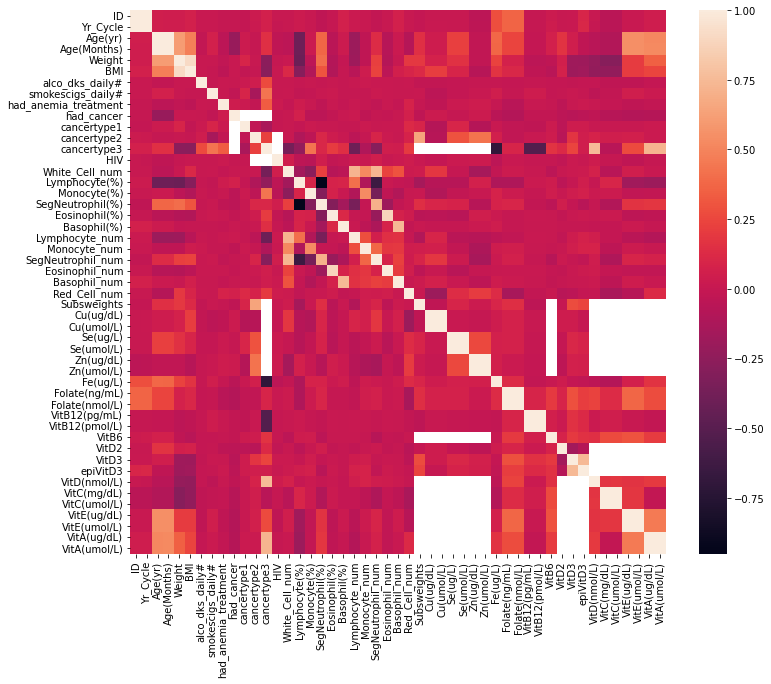

In [23]:
plt.subplots(figsize=(12,10))
sns.heatmap(merged_df.corr());

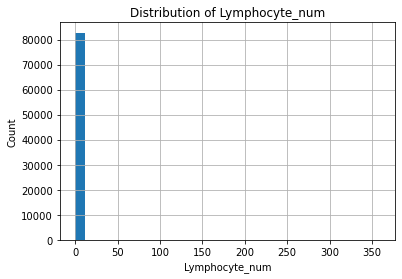

In [24]:
merged_df.Lymphocyte_num.hist(bins=30)
plt.xlabel('Lymphocyte_num')
plt.ylabel('Count')
plt.title('Distribution of Lymphocyte_num');

In [25]:
merged_df['Lymphocyte_num'][merged_df['Lymphocyte_num'] > 350]

100748    358.8
Name: Lymphocyte_num, dtype: float64

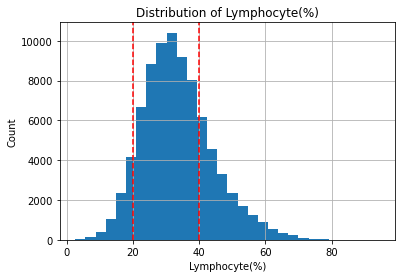

In [26]:
merged_df['Lymphocyte(%)'].hist(bins=30)
plt.xlabel('Lymphocyte(%)')
plt.ylabel('Count')
plt.title('Distribution of Lymphocyte(%)')
_ = plt.axvline(20.0, color='r', linestyle='--')
_ = plt.axvline(40.0, color='r', linestyle='--');

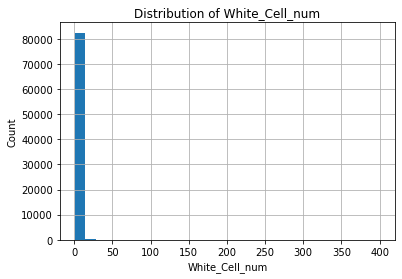

In [27]:
merged_df['White_Cell_num'].hist(bins=30)
plt.xlabel('White_Cell_num')
plt.ylabel('Count')
plt.title('Distribution of White_Cell_num');

In [28]:
merged_df['White_Cell_num'][merged_df['White_Cell_num'] > 50]

3232       54.70
18243      99.90
19204      68.30
24021      52.20
25190      55.90
39876      83.20
67006      99.99
71785      62.80
74346      55.70
84167     117.20
93830      74.20
100748    400.00
Name: White_Cell_num, dtype: float64

In [29]:
merged_df[merged_df['White_Cell_num'] > 350].T

,100748
ID,102389.0
Yr_Cycle,10.0
Gender,F
Age(yr),71.0
Age(Months),852.0
Race,Other
PregnStat,No
Weight,85.8
BMI,32.0
alco_dks_daily#,2.0


In [30]:
#drop row
new_df = merged_df[merged_df['White_Cell_num'] < 20]

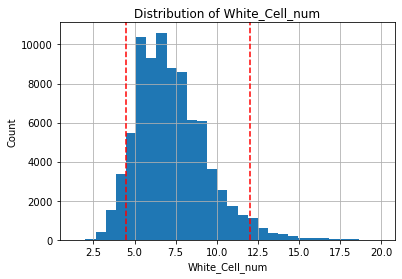

In [31]:
new_df['White_Cell_num'].hist(bins=30)
plt.xlabel('White_Cell_num')
plt.ylabel('Count')
plt.title('Distribution of White_Cell_num')
_ = plt.axvline(4.5, color='r', linestyle='--')
_ = plt.axvline(12.0, color='r', linestyle='--');

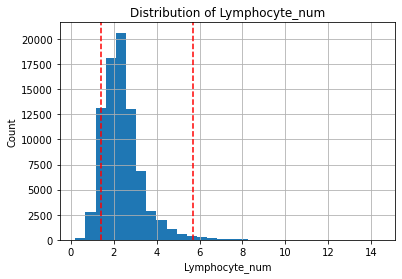

In [32]:
new_df.Lymphocyte_num.hist(bins=30)
plt.xlabel('Lymphocyte_num')
plt.ylabel('Count')
plt.title('Distribution of Lymphocyte_num');
_ = plt.axvline(1.4, color='r', linestyle='--')
_ = plt.axvline(5.7, color='r', linestyle='--')

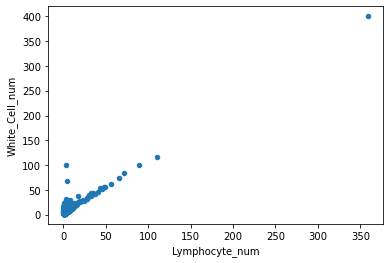

In [33]:
 merged_df.plot(x='Lymphocyte_num', y='White_Cell_num', kind='scatter');

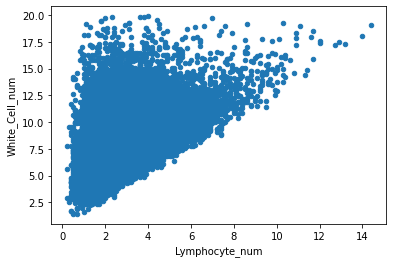

In [34]:
new_df.plot(x='Lymphocyte_num', y='White_Cell_num', kind='scatter');

In [35]:
#Lymphocyte_num is the important value that we want to use as a measure of immunity strength
# drop rows without Lymphocyte_num
merged_df = merged_df[merged_df['Lymphocyte_num'].notna()]

In [36]:
# check non-null rows per column
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82741 entries, 0 to 101315
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82741 non-null  float64
 1   Yr_Cycle              82741 non-null  float64
 2   Gender                82741 non-null  object 
 3   Age(yr)               82741 non-null  float64
 4   Age(Months)           82741 non-null  float64
 5   Race                  82741 non-null  object 
 6   PregnStat             82741 non-null  object 
 7   Weight                81703 non-null  float64
 8   BMI                   79625 non-null  float64
 9   alco_dks_daily#       30711 non-null  float64
 10  smokescigs_daily#     9162 non-null   float64
 11  had_anemia_treatment  50635 non-null  float64
 12  had_cancer            29854 non-null  float64
 13  cancertype1           2713 non-null   float64
 14  cancertype2           267 non-null    float64
 15  cancertype3       

In [37]:
cu_df = merged_df[merged_df['Cu(ug/dL)'].notna()]
cu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7260 entries, 7 to 92052
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7260 non-null   float64
 1   Yr_Cycle              7260 non-null   float64
 2   Gender                7260 non-null   object 
 3   Age(yr)               7260 non-null   float64
 4   Age(Months)           7260 non-null   float64
 5   Race                  7260 non-null   object 
 6   PregnStat             7260 non-null   object 
 7   Weight                7185 non-null   float64
 8   BMI                   7177 non-null   float64
 9   alco_dks_daily#       3290 non-null   float64
 10  smokescigs_daily#     1066 non-null   float64
 11  had_anemia_treatment  2326 non-null   float64
 12  had_cancer            1645 non-null   float64
 13  cancertype1           135 non-null    float64
 14  cancertype2           12 non-null     float64
 15  cancertype3         

In [38]:
se_df = merged_df[merged_df['Se(ug/L)'].notna()]
se_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7259 entries, 7 to 92052
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7259 non-null   float64
 1   Yr_Cycle              7259 non-null   float64
 2   Gender                7259 non-null   object 
 3   Age(yr)               7259 non-null   float64
 4   Age(Months)           7259 non-null   float64
 5   Race                  7259 non-null   object 
 6   PregnStat             7259 non-null   object 
 7   Weight                7184 non-null   float64
 8   BMI                   7176 non-null   float64
 9   alco_dks_daily#       3290 non-null   float64
 10  smokescigs_daily#     1065 non-null   float64
 11  had_anemia_treatment  2326 non-null   float64
 12  had_cancer            1645 non-null   float64
 13  cancertype1           135 non-null    float64
 14  cancertype2           12 non-null     float64
 15  cancertype3         

In [39]:
VitB6_df = merged_df[merged_df['VitB6'].notna()]
VitB6_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32579 entries, 9756 to 71915
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    32579 non-null  float64
 1   Yr_Cycle              32579 non-null  float64
 2   Gender                32579 non-null  object 
 3   Age(yr)               32579 non-null  float64
 4   Age(Months)           32579 non-null  float64
 5   Race                  32579 non-null  object 
 6   PregnStat             32579 non-null  object 
 7   Weight                32248 non-null  float64
 8   BMI                   31438 non-null  float64
 9   alco_dks_daily#       11798 non-null  float64
 10  smokescigs_daily#     4230 non-null   float64
 11  had_anemia_treatment  32579 non-null  float64
 12  had_cancer            19669 non-null  float64
 13  cancertype1           1827 non-null   float64
 14  cancertype2           172 non-null    float64
 15  cancertype3     

In [40]:
fe_df = merged_df[merged_df['Fe(ug/L)'].notna()]
fe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20602 entries, 9757 to 101315
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    20602 non-null  float64
 1   Yr_Cycle              20602 non-null  float64
 2   Gender                20602 non-null  object 
 3   Age(yr)               20602 non-null  float64
 4   Age(Months)           20602 non-null  float64
 5   Race                  20602 non-null  object 
 6   PregnStat             20602 non-null  object 
 7   Weight                20387 non-null  float64
 8   BMI                   19388 non-null  float64
 9   alco_dks_daily#       7526 non-null   float64
 10  smokescigs_daily#     2486 non-null   float64
 11  had_anemia_treatment  11346 non-null  float64
 12  had_cancer            5399 non-null   float64
 13  cancertype1           222 non-null    float64
 14  cancertype2           13 non-null     float64
 15  cancertype3    

In [41]:
#
# create a list of our conditions
conditions = [
    (merged_df['Lymphocyte_num'] >= 1.4) & (merged_df['Lymphocyte(%)'] >= 22) &
    (merged_df['SegNeutrophil_num'] >= 1.5) & (merged_df['SegNeutrophil(%)'] >= 55) &
    (merged_df['White_Cell_num'] >= 4.5)
    ]

# create a list of the values we want to assign for each condition
values = ['High']

# create a new column and use np.select to assign values to it using our lists as arguments
merged_df['immunity_strength'] = np.select(conditions, values)
merged_df.head(15)

/var/folders/gp/8m1rh1w942vg0k5blw7f84440000gn/T/ipykernel_77418/3904901583.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['immunity_strength'] = np.select(conditions, values)


,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L),immunity_strength
0,62161.0,7.0,M,22.0,264.0,MexAm,No,69.2,23.3,NaN,...,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,62162.0,7.0,F,3.0,36.0,White,No,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,62163.0,7.0,M,14.0,168.0,Other-Hisp,No,49.4,17.3,NaN,...,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,62164.0,7.0,F,44.0,528.0,MexAm,No,67.2,23.2,NaN,...,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
4,62165.0,7.0,F,14.0,168.0,Other,No,69.1,27.2,NaN,...,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,62168.0,7.0,M,6.0,72.0,Other-Hisp,No,23.6,15.4,NaN,...,74.18,5.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,62169.0,7.0,M,21.0,252.0,Other-Hisp,No,54.6,20.1,2.0,...,24.39,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,62170.0,7.0,M,15.0,180.0,Other-Hisp,No,63.5,18.2,NaN,...,82.49,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10,62171.0,7.0,M,14.0,168.0,White,No,58.2,19.9,NaN,...,55.75,5.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
11,62172.0,7.0,F,43.0,516.0,Other,No,98.6,33.3,3.0,...,35.13,3.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High


In [42]:
merged_df.shape

(82741, 53)

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82741 entries, 0 to 101315
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82741 non-null  float64
 1   Yr_Cycle              82741 non-null  float64
 2   Gender                82741 non-null  object 
 3   Age(yr)               82741 non-null  float64
 4   Age(Months)           82741 non-null  float64
 5   Race                  82741 non-null  object 
 6   PregnStat             82741 non-null  object 
 7   Weight                81703 non-null  float64
 8   BMI                   79625 non-null  float64
 9   alco_dks_daily#       30711 non-null  float64
 10  smokescigs_daily#     9162 non-null   float64
 11  had_anemia_treatment  50635 non-null  float64
 12  had_cancer            29854 non-null  float64
 13  cancertype1           2713 non-null   float64
 14  cancertype2           267 non-null    float64
 15  cancertype3       

In [44]:
merged_df['immunity_strength'].value_counts(normalize=True)

0       0.62101
High    0.37899
Name: immunity_strength, dtype: float64

In [45]:
merged_df['immunity_strength'].unique()

array(['High', '0'], dtype=object)

In [46]:
merged_df["immunity_strength"].replace({'0':'Low'}, inplace = True)

/var/folders/gp/8m1rh1w942vg0k5blw7f84440000gn/T/ipykernel_77418/1541849784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["immunity_strength"].replace({'0':'Low'}, inplace = True)


In [47]:
merged_df.head()

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L),immunity_strength
0,62161.0,7.0,M,22.0,264.0,MexAm,No,69.2,23.3,NaN,...,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,62162.0,7.0,F,3.0,36.0,White,No,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
2,62163.0,7.0,M,14.0,168.0,Other-Hisp,No,49.4,17.3,NaN,...,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
3,62164.0,7.0,F,44.0,528.0,MexAm,No,67.2,23.2,NaN,...,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
4,62165.0,7.0,F,14.0,168.0,Other,No,69.1,27.2,NaN,...,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low


In [48]:
merged_df["Gender"].replace({'M': 1, 'F': 2}, inplace = True)
merged_df["Race"].replace({'White': 1, 'Black': 2, 'MexAm': 3, 'Other': 4, 'Other-Hisp': 5}, inplace = True)
merged_df["immunity_strength"].replace({'Low': 1, 'High': 2}, inplace = True)
merged_df["PregnStat"].replace({'Yes': 1, 'No': 2, 'Unk': 3}, inplace = True)

/var/folders/gp/8m1rh1w942vg0k5blw7f84440000gn/T/ipykernel_77418/1961600096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Gender"].replace({'M': 1, 'F': 2}, inplace = True)
/var/folders/gp/8m1rh1w942vg0k5blw7f84440000gn/T/ipykernel_77418/1961600096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Race"].replace({'White': 1, 'Black': 2, 'MexAm': 3, 'Other': 4, 'Other-Hisp': 5}, inplace = True)
/var/folders/gp/8m1rh1w942vg0k5blw7f84440000gn/T/ipykernel_77418/1961600096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82741 entries, 0 to 101315
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82741 non-null  float64
 1   Yr_Cycle              82741 non-null  float64
 2   Gender                82741 non-null  int64  
 3   Age(yr)               82741 non-null  float64
 4   Age(Months)           82741 non-null  float64
 5   Race                  82741 non-null  int64  
 6   PregnStat             82741 non-null  int64  
 7   Weight                81703 non-null  float64
 8   BMI                   79625 non-null  float64
 9   alco_dks_daily#       30711 non-null  float64
 10  smokescigs_daily#     9162 non-null   float64
 11  had_anemia_treatment  50635 non-null  float64
 12  had_cancer            29854 non-null  float64
 13  cancertype1           2713 non-null   float64
 14  cancertype2           267 non-null    float64
 15  cancertype3       

In [50]:
merged_df['alco_dks_daily#'].fillna(value = 0, inplace = True)
merged_df['smokescigs_daily#'].fillna(value = 0, inplace = True)

/var/folders/gp/8m1rh1w942vg0k5blw7f84440000gn/T/ipykernel_77418/3043068285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['alco_dks_daily#'].fillna(value = 0, inplace = True)
/var/folders/gp/8m1rh1w942vg0k5blw7f84440000gn/T/ipykernel_77418/3043068285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['smokescigs_daily#'].fillna(value = 0, inplace = True)


In [51]:
merged_df.head(15)

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L),immunity_strength
0,62161.0,7.0,1,22.0,264.0,3,2,69.2,23.3,0.0,...,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,62162.0,7.0,2,3.0,36.0,1,2,12.7,14.2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,62163.0,7.0,1,14.0,168.0,5,2,49.4,17.3,0.0,...,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,62164.0,7.0,2,44.0,528.0,3,2,67.2,23.2,0.0,...,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,62165.0,7.0,2,14.0,168.0,4,2,69.1,27.2,0.0,...,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,62168.0,7.0,1,6.0,72.0,5,2,23.6,15.4,0.0,...,74.18,5.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,62169.0,7.0,1,21.0,252.0,5,2,54.6,20.1,2.0,...,24.39,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,62170.0,7.0,1,15.0,180.0,5,2,63.5,18.2,0.0,...,82.49,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,62171.0,7.0,1,14.0,168.0,1,2,58.2,19.9,0.0,...,55.75,5.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
11,62172.0,7.0,2,43.0,516.0,4,2,98.6,33.3,3.0,...,35.13,3.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [76]:
pca_df_colnames = {
    "SEQN": "ID",
    "RIAGENDR": "Gender",
    "RIDAGEMN": "Age(Months)",
    "RIDRETH1": "Race",
    "RIDEXPRG": "PregnStat",
    "LBXWBCSI" : "White_Cell_num",
    "LBXLYPCT" : "Lymphocyte(%)",
    "LBXNEPCT" : "SegNeutrophil(%)",
    "LBDLYMNO" : "Lymphocyte_num",
    "LBDNENO" : "SegNeutrophil_num",
    'LBDHI': 'HIV',
    'LBDSCUSI': 'Cu(umol/L)',
    'LBDSSESI': 'Se(umol/L)',
    'LBDSZNSI': 'Zn(umol/L)',
    'LBDFERSI': 'Fe(ug/L)', 
    'LBDRFOSI':'Folate(nmol/L)', 
    'LBDB12SI':'VitB12(pmol/L)', 
    'LBXPLP':'VitB6',
    'LBXVD2MS':'VitD2', 
    'LBXVD3MS':'VitD3', 
    'LBDVIDMS':'VitD(nmol/L)',
    'LBDVICSI':'VitC(umol/L)',
    'LBDVIESI':'VitE(umol/L)',  
    'LBDVIASI':'VitA(umol/L)',
    'BMXWT':'Weight', 
    'BMXBMI':'BMI',
    'ALQ130': 'alco_dks_daily#',
    'SMD650': 'smokescigs_daily#',
    'MCQ053': 'had_anemia_treatment',
    'MCQ220': 'had_cancer',
    'Immunity': 'immunity_strength'
}

In [77]:
pca_df = merged_df[list(pca_df_colnames.values())]
pca_df.head()

,ID,Gender,Age(Months),Race,PregnStat,White_Cell_num,Lymphocyte(%),SegNeutrophil(%),Lymphocyte_num,SegNeutrophil_num,...,VitC(umol/L),VitE(umol/L),VitA(umol/L),Weight,BMI,alco_dks_daily#,smokescigs_daily#,had_anemia_treatment,had_cancer,immunity_strength
0,62161.0,1,264.0,3,2,5.1,27.0,60.1,1.4,3.1,...,NaN,NaN,NaN,69.2,23.3,0.0,0.0,2.0,2.0,2
1,62162.0,2,36.0,1,2,17.6,55.5,36.9,9.8,6.5,...,NaN,NaN,NaN,12.7,14.2,0.0,0.0,2.0,NaN,1
2,62163.0,1,168.0,5,2,5.1,44.9,36.1,2.3,1.8,...,NaN,NaN,NaN,49.4,17.3,0.0,0.0,2.0,NaN,1
3,62164.0,2,528.0,3,2,5.6,27.2,58.7,1.5,3.3,...,NaN,NaN,NaN,67.2,23.2,0.0,0.0,2.0,2.0,2
4,62165.0,2,168.0,4,2,7.5,34.8,54.3,2.6,4.1,...,NaN,NaN,NaN,69.1,27.2,0.0,0.0,2.0,NaN,1


In [78]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82741 entries, 0 to 101315
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82741 non-null  float64
 1   Gender                82741 non-null  int64  
 2   Age(Months)           82741 non-null  float64
 3   Race                  82741 non-null  int64  
 4   PregnStat             82741 non-null  int64  
 5   White_Cell_num        82741 non-null  float64
 6   Lymphocyte(%)         82741 non-null  float64
 7   SegNeutrophil(%)      82741 non-null  float64
 8   Lymphocyte_num        82741 non-null  float64
 9   SegNeutrophil_num     82741 non-null  float64
 10  HIV                   32633 non-null  float64
 11  Cu(umol/L)            7260 non-null   float64
 12  Se(umol/L)            7259 non-null   float64
 13  Zn(umol/L)            7259 non-null   float64
 14  Fe(ug/L)              20602 non-null  float64
 15  Folate(nmol/L)    

In [80]:
pca_df['HIV'].unique()

array([ 2., nan,  1.,  3.])

In [85]:
pca_df['HIV'].notna()

0          True
1         False
2         False
3          True
4         False
          ...  
101311    False
101312     True
101313     True
101314    False
101315     True
Name: HIV, Length: 82741, dtype: bool

----------------------------------------------------------------------------------------------------------------------

In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [67]:
pca_df_scale = pca_df.set_index('ID')

In [68]:
#Save the labels 
cpa_df_index = cpa_df_scale.index
#Save the column names 
cpa_df_columns = cpa_df_scale.columns
cpa_df_scale.head()

,Gender,Age(Months),Race,PregnStat,White_Cell_num,Lymphocyte(%),SegNeutrophil(%),Lymphocyte_num,SegNeutrophil_num,HIV,...,VitD(nmol/L),VitC(umol/L),VitE(umol/L),VitA(umol/L),Weight,BMI,alco_dks_daily#,smokescigs_daily#,had_anemia_treatment,had_cancer
ID,,,,,,,,,,,,,,,,,,,,,
62161.0,1,264.0,3,2,5.1,27.0,60.1,1.4,3.1,2.0,...,NaN,NaN,NaN,NaN,69.2,23.3,0.0,0.0,2.0,2.0
62162.0,2,36.0,1,2,17.6,55.5,36.9,9.8,6.5,NaN,...,NaN,NaN,NaN,NaN,12.7,14.2,0.0,0.0,2.0,NaN
62163.0,1,168.0,5,2,5.1,44.9,36.1,2.3,1.8,NaN,...,NaN,NaN,NaN,NaN,49.4,17.3,0.0,0.0,2.0,NaN
62164.0,2,528.0,3,2,5.6,27.2,58.7,1.5,3.3,2.0,...,NaN,NaN,NaN,NaN,67.2,23.2,0.0,0.0,2.0,2.0
62165.0,2,168.0,4,2,7.5,34.8,54.3,2.6,4.1,NaN,...,NaN,NaN,NaN,NaN,69.1,27.2,0.0,0.0,2.0,NaN


In [69]:
cpa_df_scale = scale(cpa_df_scale)

In [71]:
cpa_df_scaled_df = pd.DataFrame(cpa_df_scale, columns = cpa_df_columns)
cpa_df_scaled_df.head()

,Gender,Age(Months),Race,PregnStat,White_Cell_num,Lymphocyte(%),SegNeutrophil(%),Lymphocyte_num,SegNeutrophil_num,HIV,...,VitD(nmol/L),VitC(umol/L),VitE(umol/L),VitA(umol/L),Weight,BMI,alco_dks_daily#,smokescigs_daily#,had_anemia_treatment,had_cancer
0,-1.013788,-0.507166,0.090035,0.053991,-0.804065,-0.617544,0.463511,-0.568744,-0.538717,0.063907,...,NaN,NaN,NaN,NaN,0.090975,-0.338458,-0.075151,-0.088024,0.10047,0.212435
1,0.986399,-1.294614,-1.518777,0.053991,3.753688,2.042365,-1.513169,4.167681,1.362642,NaN,...,NaN,NaN,NaN,NaN,-1.841674,-1.541107,-0.075151,-0.088024,0.10047,NaN
2,-1.013788,-0.838723,1.698847,0.053991,-0.804065,1.053065,-1.581330,-0.061270,-1.265707,NaN,...,NaN,NaN,NaN,NaN,-0.586307,-1.131414,-0.075151,-0.088024,0.10047,NaN
3,0.986399,0.404615,0.090035,0.053991,-0.621754,-0.598878,0.344228,-0.512358,-0.426872,0.063907,...,NaN,NaN,NaN,NaN,0.022563,-0.351674,-0.075151,-0.088024,0.10047,0.212435
4,0.986399,-0.838723,0.894441,0.053991,0.071024,0.110431,-0.030659,0.107888,0.020507,NaN,...,NaN,NaN,NaN,NaN,0.087555,0.176962,-0.075151,-0.088024,0.10047,NaN
